In [1]:
import numpy as np
from gemmi import cif
import matplotlib.pyplot as plt

def plot_isotherm(filename, color):
    
    aif = cif.read_file(filename)
    block = aif.sole_block()
    ads_press = np.array(block.find_loop('_adsorp_pressure'),dtype=float)
    ads_amount = np.array(block.find_loop('_adsorp_amount'),dtype=float)
    des_press = np.array(block.find_loop('_desorp_pressure'),dtype=float)
    des_amount = np.array(block.find_loop('_desorp_amount'),dtype=float)

    material_id = block.find_pair('_sample_material_id')[-1]
    adsorptive = block.find_pair('_exptl_adsorptive')[-1]
    temperature = block.find_pair('_exptl_temperature')[-1]

    print(adsorptive)
    print(temperature)
    plt.plot(ads_press,ads_amount, 'o-', color=color, label=(adsorptive+"@"+str(temperature)))
    plt.plot(des_press,des_amount, 'o-', color=color, markerfacecolor="white")
    plt.legend()
    plt.ylabel("quantity adsorbed / "+block.find_pair('_units_loading')[-1])
    plt.xlabel("pressure / "+block.find_pair('_units_pressure')[-1])
    plt.title(material_id)
    return


Nitrogen
77.3


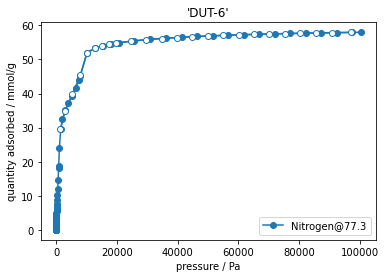

In [2]:
plot_isotherm("./NK_DUT-6_LP_N2_114PKT.aif", "C0")
plt.show()
